<a href="https://colab.research.google.com/github/aguilarmadeira/Optimization/blob/main/mallows3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1, best distance: 8716.82
Iteration 2, best distance: 8716.82
Iteration 3, best distance: 8212.66
Iteration 4, best distance: 8212.66
Iteration 5, best distance: 8212.66
Iteration 6, best distance: 8212.66
Iteration 7, best distance: 8212.66
Iteration 8, best distance: 8212.66
Iteration 9, best distance: 7875.70
Iteration 10, best distance: 7875.70
Iteration 11, best distance: 7875.70
Iteration 12, best distance: 7744.48
Iteration 13, best distance: 7744.48
Iteration 14, best distance: 7744.48
Iteration 15, best distance: 7744.48
Iteration 16, best distance: 7744.48
Iteration 17, best distance: 7744.48
Iteration 18, best distance: 7744.48
Iteration 19, best distance: 7744.48
Iteration 20, best distance: 7744.48
Iteration 21, best distance: 7744.48
Iteration 22, best distance: 7744.48
Iteration 23, best distance: 7744.48
Iteration 24, best distance: 7744.48
Iteration 25, best distance: 7744.48
Iteration 26, best distance: 7744.48
Iteration 27, best distance: 7744.48
Iteration 

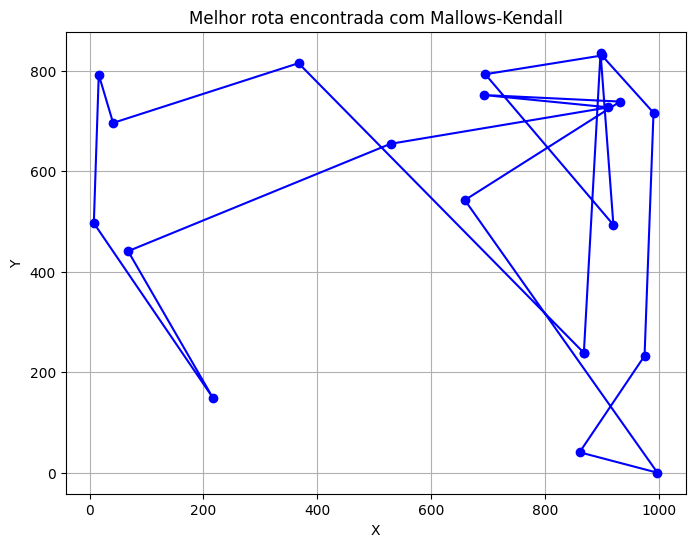

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import mallows_kendall as mk

# Classe representando uma cidade no TSP
class City:
    def __init__(self):
        self.x = np.random.uniform(0, 1000)
        self.y = np.random.uniform(0, 1000)

    def distance(self, city):
        return np.hypot(self.x - city.x, self.y - city.y)

# Classe para o problema TSP
class TSP:
    def __init__(self, num_cities):
        self.cities = [City() for _ in range(num_cities)]

    def tour_distance(self, perm):
        return sum(self.cities[perm[i]].distance(self.cities[perm[(i + 1) % len(perm)]]) for i in range(len(perm)))

# Solucionador utilizando o modelo Mallows-Kendall
class MallowsKendallTSP:
    def __init__(self, num_cities, phi=0.8, m_samples=20):
        self.num_cities = num_cities
        self.phi = phi
        self.m_samples = m_samples
        self.problem = TSP(num_cities)
        self.best_tour = np.random.permutation(num_cities)
        self.best_distance = self.problem.tour_distance(self.best_tour)

    def optimize(self, iterations=100):
        current_tour = self.best_tour.copy()

        for iteration in range(iterations):
            sampled_tours = mk.sample(m=self.m_samples, n=self.num_cities, phi=self.phi, s0=current_tour)

            for candidate in sampled_tours:
                candidate_distance = self.problem.tour_distance(candidate)
                if candidate_distance < self.best_distance:
                    self.best_distance = candidate_distance
                    self.best_tour = candidate.copy()
                    current_tour = candidate.copy()

            print(f"Iteration {iteration+1}, best distance: {self.best_distance:.2f}")

    def plot_solution(self):
        xs = [self.problem.cities[i].x for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].x]
        ys = [self.problem.cities[i].y for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].y]
        plt.figure(figsize=(8, 6))
        plt.plot(xs, ys, '-o', color='blue')
        plt.title('Melhor rota encontrada com Mallows-Kendall')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid()
        plt.show()

# Exemplo de utilização
solver = MallowsKendallTSP(num_cities=20, phi=0.7, m_samples=100)
solver.optimize(iterations=100)
solver.plot_solution()

Iteration 1, best distance: 12503.95
Iteration 2, best distance: 11844.73
Iteration 3, best distance: 11844.73
Iteration 4, best distance: 11338.67
Iteration 5, best distance: 11338.67
Iteration 6, best distance: 11338.67
Iteration 7, best distance: 11338.67
Iteration 8, best distance: 11338.67
Iteration 9, best distance: 11338.67
Iteration 10, best distance: 11338.67
Iteration 11, best distance: 11338.67
Iteration 12, best distance: 11338.67
Iteration 13, best distance: 11338.67
Iteration 14, best distance: 11338.67
Iteration 15, best distance: 11338.67
Iteration 16, best distance: 11338.67
Iteration 17, best distance: 11338.67
Iteration 18, best distance: 11338.67
Iteration 19, best distance: 11338.67
Iteration 20, best distance: 11338.67
Iteration 21, best distance: 11338.67
Iteration 22, best distance: 11338.67
Iteration 23, best distance: 11338.67
Iteration 24, best distance: 11338.67
Iteration 25, best distance: 11338.67
Iteration 26, best distance: 11338.67
Iteration 27, best di

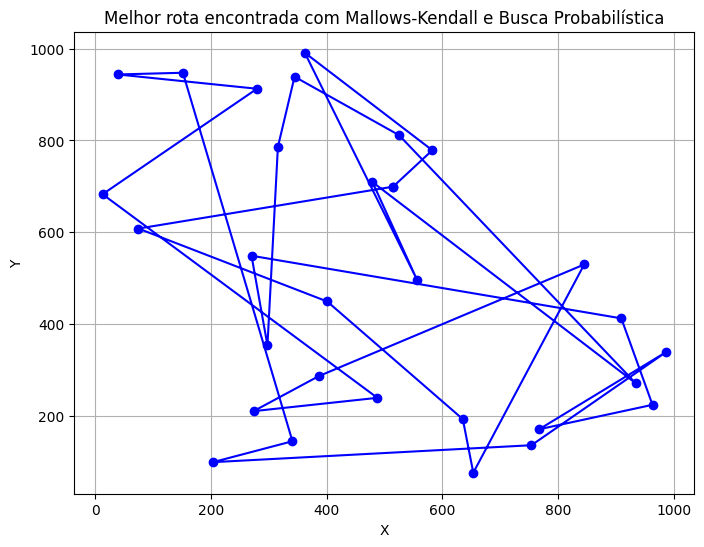

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import mallows_kendall as mk

# Classe representando uma cidade no TSP
class City:
    def __init__(self):
        self.x = np.random.uniform(0, 1000)
        self.y = np.random.uniform(0, 1000)

    def distance(self, city):
        return np.hypot(self.x - city.x, self.y - city.y)

# Classe para o problema TSP
class TSP:
    def __init__(self, num_cities):
        self.cities = [City() for _ in range(num_cities)]

    def tour_distance(self, perm):
        return sum(self.cities[perm[i]].distance(self.cities[perm[(i + 1) % len(perm)]]) for i in range(len(perm)))

# Classe usando Mallows-Kendall com busca local probabilística
class MallowsKendallTSP:
    def __init__(self, num_cities, phi=0.8, m_samples=20):
        self.num_cities = num_cities
        self.phi = phi
        self.m_samples = m_samples
        self.problem = TSP(num_cities)
        self.best_tour = np.random.permutation(num_cities)
        self.best_distance = self.problem.tour_distance(self.best_tour)

    # Critério de aceitação probabilística semelhante ao Simulated Annealing
    def accept_prob(self, current_distance, new_distance, T):
        if new_distance < current_distance:
            return 1.0
        else:
            return np.exp(-(new_distance - current_distance) / T)

    # Otimização com Mallows-Kendall e busca probabilística
    def optimize(self, iterations=100, initial_temp=1000, alpha=0.95):
        current_tour = self.best_tour.copy()
        T = initial_temp = initial_temp = 1000

        for iteration in range(iterations):
            sampled_tours = mk.sample(m=self.m_samples, n=self.num_cities, phi=self.phi, s0=current_tour)

            for candidate in sampled_tours:
                candidate_distance = self.problem.tour_distance(candidate)
                acceptance_probability = self.accept_prob(self.best_distance, candidate_distance, T)
                if np.random.rand() < acceptance_probability:
                    current_tour = candidate.copy()
                    if candidate_distance < self.best_distance:
                        self.best_distance = candidate_distance
                        self.best_tour = candidate.copy()

            T *= 0.95  # Redução da temperatura a cada iteração

            print(f"Iteration {iteration + 1}, best distance: {self.best_distance:.2f}")

    def plot_solution(self):
        xs = [self.problem.cities[i].x for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].x]
        ys = [self.problem.cities[i].y for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].y]
        plt.figure(figsize=(8, 6))
        plt.plot(xs, ys, '-o', color='blue')
        plt.title('Melhor rota encontrada com Mallows-Kendall e Busca Probabilística')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid()
        plt.show()

# Exemplo de utilização
solver = MallowsKendallTSP(num_cities=30, phi=0.8, m_samples=300)
solver.optimize(iterations=200)
solver.plot_solution()

Iteration 1, best distance: 7761.35
Iteration 2, best distance: 7761.35
Iteration 3, best distance: 7761.35
Iteration 4, best distance: 7761.35
Iteration 5, best distance: 7761.35
Iteration 6, best distance: 7761.35
Iteration 7, best distance: 7761.35
Iteration 8, best distance: 7761.35
Iteration 9, best distance: 7761.35
Iteration 10, best distance: 7761.35
Iteration 11, best distance: 7761.35
Iteration 12, best distance: 7761.35
Iteration 13, best distance: 7761.35
Iteration 14, best distance: 7761.35
Iteration 15, best distance: 7761.35
Iteration 16, best distance: 7761.35
Iteration 17, best distance: 7761.35
Iteration 18, best distance: 7761.35
Iteration 19, best distance: 7761.35
Iteration 20, best distance: 7761.35
Iteration 21, best distance: 7761.35
Iteration 22, best distance: 7761.35
Iteration 23, best distance: 7761.35
Iteration 24, best distance: 7761.35
Iteration 25, best distance: 7761.35
Iteration 26, best distance: 7761.35
Iteration 27, best distance: 7761.35
Iteration 

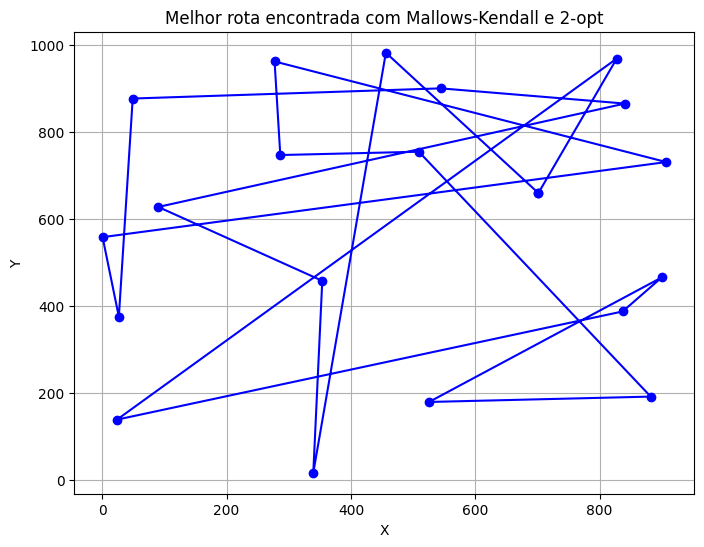

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import mallows_kendall as mk

# Classe representando uma cidade no TSP
class City:
    def __init__(self):
        self.x = np.random.uniform(0, 1000)
        self.y = np.random.uniform(0, 1000)

    def distance(self, city):
        return np.hypot(self.x - city.x, self.y - city.y)

# Classe para o problema TSP
class TSP:
    def __init__(self, num_cities):
        self.cities = [City() for _ in range(num_cities)]

    def tour_distance(self, perm):
        return sum(self.cities[perm[i]].distance(self.cities[perm[(i + 1) % len(perm)]]) for i in range(len(perm)))

# Busca local 2-opt
def two_opt(route, problem):
    best_route = route.copy()
    best_distance = problem.tour_distance(best_route)
    improved = True

    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                new_route = best_route[:]
                new_route[i:j] = best_route[j-1:i-1:-1]
                new_distance = problem.tour_distance(new_route)
                if new_distance < best_distance:
                    best_distance = new_distance
                    best_route = new_route
                    improved = True

    return best_route, best_distance

# Classe usando Mallows-Kendall com busca local híbrida
class MallowsKendallTSP:
    def __init__(self, num_cities, phi=0.8, m_samples=20):
        self.num_cities = num_cities
        self.phi = phi
        self.m_samples = m_samples
        self.problem = TSP(num_cities)
        self.best_tour = np.random.permutation(num_cities)
        self.best_distance = self.problem.tour_distance(self.best_tour)

    def optimize(self, iterations=100):
        current_tour = self.best_tour.copy()

        for iteration in range(iterations):
            sampled_tours = mk.sample(m=self.m_samples, n=self.num_cities, phi=self.phi, s0=current_tour)

            for candidate in sampled_tours:
                candidate_distance = self.problem.tour_distance(candidate)
                if candidate_distance < self.best_distance:
                    self.best_distance = candidate_distance
                    self.best_tour = candidate.copy()
                    current_tour = candidate.copy()

            # Aplicar busca local (2-opt) para melhorar ainda mais a solução
            current_tour, current_distance = two_opt(current_tour, self.problem)
            if current_distance < self.best_distance:
                self.best_distance = current_distance
                self.best_tour = current_tour.copy()

            print(f"Iteration {iteration + 1}, best distance: {self.best_distance:.2f}")

    def plot_solution(self):
        xs = [self.problem.cities[i].x for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].x]
        ys = [self.problem.cities[i].y for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].y]
        plt.figure(figsize=(8, 6))
        plt.plot(xs, ys, '-o', color='blue')
        plt.title('Melhor rota encontrada com Mallows-Kendall e 2-opt')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid()
        plt.show()

# Exemplo de utilização
solver = MallowsKendallTSP(num_cities=20, phi=0.8, m_samples=100)
solver.optimize(iterations=200)
solver.plot_solution()

Iteration 1, best distance: 4242.58
Iteration 2, best distance: 4242.58
Iteration 3, best distance: 4242.58
Iteration 4, best distance: 4242.58
Iteration 5, best distance: 4242.58
Iteration 6, best distance: 4242.58
Iteration 7, best distance: 4242.58
Iteration 8, best distance: 4242.58
Iteration 9, best distance: 4242.58
Iteration 10, best distance: 4242.58
Iteration 11, best distance: 4242.58
Iteration 12, best distance: 4242.58
Iteration 13, best distance: 4153.27
Iteration 14, best distance: 4153.27
Iteration 15, best distance: 4153.27
Iteration 16, best distance: 4153.27
Iteration 17, best distance: 4153.27
Iteration 18, best distance: 4153.27
Iteration 19, best distance: 4153.27
Iteration 20, best distance: 4153.27
Iteration 21, best distance: 4153.27
Iteration 22, best distance: 4153.27
Iteration 23, best distance: 4153.27
Iteration 24, best distance: 4153.27
Iteration 25, best distance: 4153.27
Iteration 26, best distance: 4153.27
Iteration 27, best distance: 4153.27
Iteration 

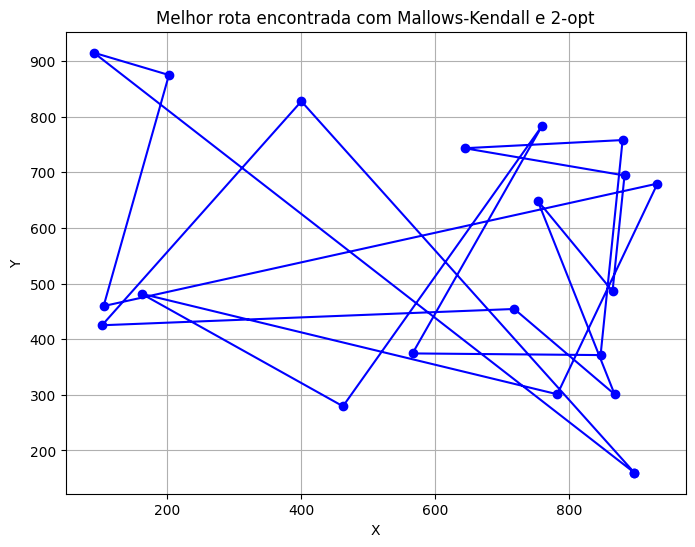

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import mallows_kendall as mk

# Classe representando uma cidade no TSP
class City:
    def __init__(self):
        self.x = np.random.uniform(0, 1000)
        self.y = np.random.uniform(0, 1000)

    def distance(self, city):
        return np.hypot(self.x - city.x, self.y - city.y)

# Classe para o problema TSP
class TSP:
    def __init__(self, num_cities):
        self.cities = [City() for _ in range(num_cities)]

    def tour_distance(self, perm):
        return sum(self.cities[perm[i]].distance(self.cities[perm[(i + 1) % len(perm)]]) for i in range(len(perm)))

# Busca local 2-opt
def two_opt(route, problem):
    best_route = route.copy()
    best_distance = problem.tour_distance(best_route)
    improved = True

    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                new_route = best_route[:]
                new_route[i:j] = best_route[j-1:i-1:-1]
                new_distance = problem.tour_distance(new_route)
                if new_distance < best_distance:
                    best_distance = new_distance
                    best_route = new_route
                    improved = True

    return best_route, best_distance

# Solução inicial usando Nearest Neighbor
def nearest_neighbor(problem):
    num_cities = len(problem.cities)
    unvisited = list(range(num_cities))
    tour = [unvisited.pop(0)]

    while unvisited:
        last_city = tour[-1]
        next_city = min(unvisited, key=lambda city: problem.cities[last_city].distance(problem.cities[city]))
        tour.append(next_city)
        unvisited.remove(next_city)

    return np.array(tour)

# Classe usando Mallows-Kendall com busca local híbrida
class MallowsKendallTSP:
    def __init__(self, num_cities, phi=0.8, m_samples=20):
        self.num_cities = num_cities
        self.phi = phi
        self.m_samples = m_samples
        self.problem = TSP(num_cities)
        self.best_tour = nearest_neighbor(self.problem)
        self.best_distance = self.problem.tour_distance(self.best_tour)

    def optimize(self, iterations=100):
        current_tour = self.best_tour.copy()

        for iteration in range(iterations):
            sampled_tours = mk.sample(m=self.m_samples, n=self.num_cities, phi=self.phi, s0=current_tour)

            for candidate in sampled_tours:
                candidate_distance = self.problem.tour_distance(candidate)
                if candidate_distance < self.best_distance:
                    self.best_distance = candidate_distance
                    self.best_tour = candidate.copy()
                    current_tour = candidate.copy()

            # Aplicar busca local (2-opt)
            current_tour, current_distance = two_opt(current_tour, self.problem)
            if current_distance < self.best_distance:
                self.best_distance = current_distance
                self.best_tour = current_tour.copy()

            print(f"Iteration {iteration + 1}, best distance: {self.best_distance:.2f}")

    def plot_solution(self):
        xs = [self.problem.cities[i].x for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].x]
        ys = [self.problem.cities[i].y for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].y]
        plt.figure(figsize=(8, 6))
        plt.plot(xs, ys, '-o', color='blue')
        plt.title('Melhor rota encontrada com Mallows-Kendall e 2-opt')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid()
        plt.show()

# Exemplo de utilização
solver = MallowsKendallTSP(num_cities=20, phi=0.8, m_samples=20)
solver.optimize(iterations=100)
solver.plot_solution()



Iteration 1, best distance: 3638.81
Iteration 2, best distance: 3638.81
Iteration 3, best distance: 3638.81
Iteration 4, best distance: 3386.79
Iteration 5, best distance: 3386.79
Iteration 6, best distance: 3386.79
Iteration 7, best distance: 3386.79
Iteration 8, best distance: 3386.79
Iteration 9, best distance: 3386.79
Iteration 10, best distance: 3262.49
Iteration 11, best distance: 3262.49
Iteration 12, best distance: 3262.49
Iteration 13, best distance: 3262.49
Iteration 14, best distance: 3262.49
Iteration 15, best distance: 3262.49
Iteration 16, best distance: 3262.49
Iteration 17, best distance: 3262.49
Iteration 18, best distance: 3262.49
Iteration 19, best distance: 3262.49
Iteration 20, best distance: 3262.49
Iteration 21, best distance: 3262.49
Iteration 22, best distance: 3262.49
Iteration 23, best distance: 3262.49
Iteration 24, best distance: 3262.49
Iteration 25, best distance: 3262.49
Iteration 26, best distance: 3262.49
Iteration 27, best distance: 3262.49
Iteration 

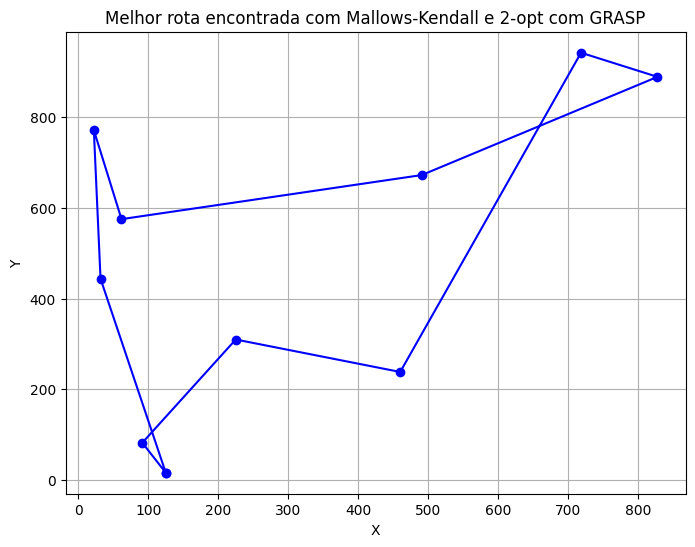

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import mallows_kendall as mk

# Classe representando uma cidade no TSP
class City:
    def __init__(self):
        self.x = np.random.uniform(0, 1000)
        self.y = np.random.uniform(0, 1000)

    def distance(self, city):
        return np.hypot(self.x - city.x, self.y - city.y)

# Classe para o problema TSP
class TSP:
    def __init__(self, num_cities):
        self.cities = [City() for _ in range(num_cities)]

    def tour_distance(self, perm):
        return sum(self.cities[perm[i]].distance(self.cities[perm[(i + 1) % len(perm)]]) for i in range(len(perm)))

# Busca local 2-opt
def two_opt(route, problem):
    best_route = route.copy()
    best_distance = problem.tour_distance(best_route)
    improved = True

    while improved:
        improved = False
        for i in range(1, len(route) - 1):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue
                new_route = best_route[:]
                new_route[i:j] = best_route[j-1:i-1:-1]
                new_distance = problem.tour_distance(new_route)
                if new_distance < best_distance:
                    best_distance = new_distance
                    best_route = new_route
                    improved = True
    return best_route

# Inicialização usando GRASP simplificado
def grasp_initialization(problem, num_candidates=100):
    best_tour = None
    best_distance = float('inf')

    for _ in range(num_candidates):  # Correção feita aqui
        candidate = np.random.permutation(len(problem.cities))
        candidate_distance = problem.tour_distance(candidate)
        if candidate_distance < best_distance:
            best_distance = candidate_distance
            best_tour = candidate
    return best_tour

# Classe usando o modelo Mallows-Kendall
class MallowsKendallTSP:
    def __init__(self, num_cities, phi=0.8, m_samples=20):
        self.num_cities = num_cities
        self.phi = phi
        self.m_samples = m_samples
        self.problem = TSP(num_cities)
        self.best_tour = grasp_initialization(self.problem)
        self.best_distance = self.problem.tour_distance(self.best_tour)

    def optimize(self, iterations=100):
        current_tour = self.best_tour.copy()

        for iteration in range(iterations):
            sampled_tours = mk.sample(m=self.m_samples, n=self.num_cities, phi=self.phi, s0=current_tour)

            for candidate in sampled_tours:
                candidate_distance = self.problem.tour_distance(candidate)
                if candidate_distance < self.best_distance:
                    self.best_distance = candidate_distance
                    self.best_tour = candidate.copy()
                    current_tour = candidate.copy()

            current_tour = two_opt(current_tour, self.problem)
            current_distance = self.problem.tour_distance(current_tour)

            if current_distance < self.best_distance:
                self.best_distance = current_distance
                self.best_tour = current_tour.copy()

            print(f"Iteration {iteration + 1}, best distance: {self.best_distance:.2f}")

    def plot_solution(self):
        xs = [self.problem.cities[i].x for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].x]
        ys = [self.problem.cities[i].y for i in self.best_tour] + [self.problem.cities[self.best_tour[0]].y]
        plt.figure(figsize=(8, 6))
        plt.plot(xs, ys, '-o', color='blue')
        plt.title('Melhor rota encontrada com Mallows-Kendall e 2-opt com GRASP')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid()
        plt.show()

# Exemplo de utilização
solver = MallowsKendallTSP(num_cities=10, phi=0.8, m_samples=30)
solver.optimize(iterations=100)
solver.plot_solution()